In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sales-data-of-100k/bike_sales_100k.csv


In [2]:

import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("/kaggle/input/bike-sales-data-of-100k/bike_sales_100k.csv")

In [3]:
df.head()

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender
0,1,11-07-2022,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female
1,2,03-05-2024,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male
2,3,01-09-2022,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,Female
3,4,28-09-2022,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,Male
4,5,05-01-2021,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,Female


In [4]:
df.isnull().sum()

Sale_ID            0
Date               0
Customer_ID        0
Bike_Model         0
Price              0
Quantity           0
Store_Location     0
Salesperson_ID     0
Payment_Method     0
Customer_Age       0
Customer_Gender    0
dtype: int64

# We will do the following analysis:

1. Age Group more interested in bikes
2. Brand of bike that a category is interested in
3. Time during which most sales occur
4. Which region buys bikes more 


## Let us first remove the columns that have distinct values - ID related 

In [5]:
df.columns

Index(['Sale_ID', 'Date', 'Customer_ID', 'Bike_Model', 'Price', 'Quantity',
       'Store_Location', 'Salesperson_ID', 'Payment_Method', 'Customer_Age',
       'Customer_Gender'],
      dtype='object')

In [6]:
df.drop(columns=['Sale_ID','Customer_ID','Salesperson_ID'],inplace=True)

In [7]:
df.head()

,Date,Bike_Model,Price,Quantity,Store_Location,Payment_Method,Customer_Age,Customer_Gender
0,11-07-2022,Cruiser,318.32,1,Philadelphia,Apple Pay,70,Female
1,03-05-2024,Hybrid Bike,3093.47,4,Chicago,Apple Pay,37,Male
2,01-09-2022,Folding Bike,4247.99,3,San Antonio,PayPal,59,Female
3,28-09-2022,Mountain Bike,1722.01,3,San Antonio,Apple Pay,19,Male
4,05-01-2021,BMX,3941.44,3,Philadelphia,PayPal,67,Female


####  We will just extract the month from Date. This will help the business find insights about the season ( summer / winter/ automn) more bikes to sell

In [8]:
df['Date']=pd.to_datetime(df['Date'],format="%d-%m-%Y").dt.month

In [9]:
df.head()

,Date,Bike_Model,Price,Quantity,Store_Location,Payment_Method,Customer_Age,Customer_Gender
0,7,Cruiser,318.32,1,Philadelphia,Apple Pay,70,Female
1,5,Hybrid Bike,3093.47,4,Chicago,Apple Pay,37,Male
2,9,Folding Bike,4247.99,3,San Antonio,PayPal,59,Female
3,9,Mountain Bike,1722.01,3,San Antonio,Apple Pay,19,Male
4,1,BMX,3941.44,3,Philadelphia,PayPal,67,Female


In [10]:
### Different Types of Bike Models
df['Bike_Model'].unique()

array(['Cruiser', 'Hybrid Bike', 'Folding Bike', 'Mountain Bike', 'BMX',
       'Road Bike', 'Electric Bike'], dtype=object)

In [11]:
df.sort_values(by=['Price'],ascending=False)

,Date,Bike_Model,Price,Quantity,Store_Location,Payment_Method,Customer_Age,Customer_Gender
43076,8,Electric Bike,4999.81,1,San Antonio,Apple Pay,63,Male
66929,8,BMX,4999.75,2,Chicago,Credit Card,67,Female
24836,7,Electric Bike,4999.71,2,Chicago,Credit Card,54,Male
59187,8,Road Bike,4999.70,4,Philadelphia,Credit Card,45,Female
5673,3,BMX,4999.67,5,Chicago,Credit Card,22,Male
...,...,...,...,...,...,...,...,...
66157,6,BMX,200.05,3,Los Angeles,Credit Card,46,Female
39046,3,Hybrid Bike,200.03,2,Houston,Credit Card,64,Female
94161,1,Mountain Bike,200.03,5,Chicago,Google Pay,31,Male
63054,3,BMX,200.02,2,Los Angeles,Google Pay,55,Male


## For the sake of simplicity, calculate the Avg Price of Bikes

In [12]:
df2=df.groupby(['Bike_Model','Store_Location']).agg({'Price':'mean','Quantity':'sum'}).reset_index().sort_values(by='Price')

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns

# BIKE MODEL VS PRICE

<Axes: xlabel='Bike_Model', ylabel='Price'>

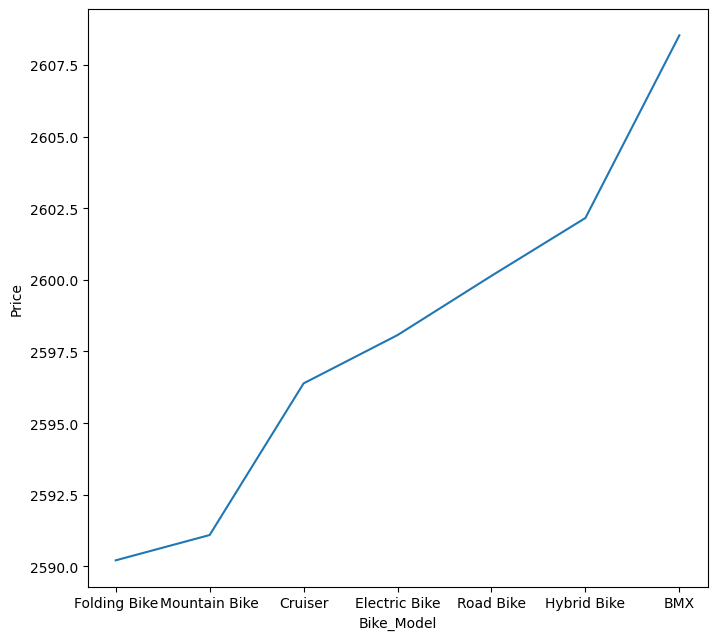

In [14]:
df3=df2.groupby(['Bike_Model']).agg({'Price':'mean'}).reset_index().sort_values(by='Price')
plt.figure(figsize=(8,7.5))
sns.lineplot(x='Bike_Model',y='Price',data=df3,orient='x')

<Axes: xlabel='Store_Location', ylabel='Quantity'>

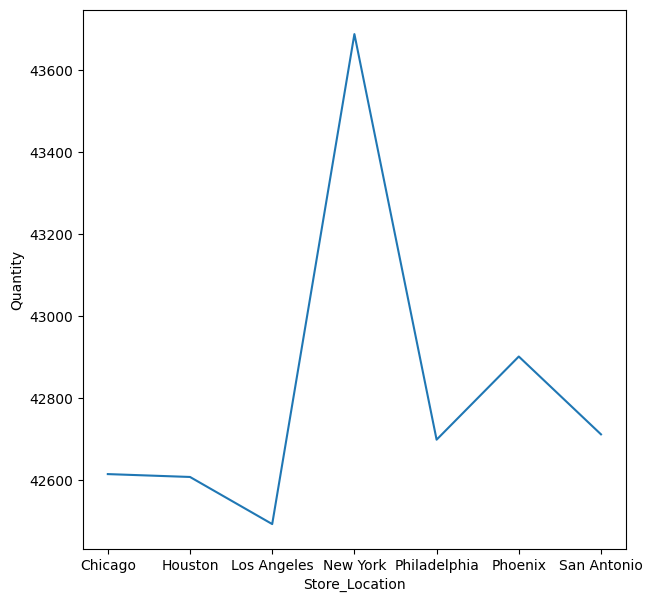

In [15]:
df4=df.groupby(['Store_Location']).agg({'Quantity':'sum'}).reset_index()
plt.figure(figsize=(7,7))
sns.lineplot(x='Store_Location',y='Quantity',data=df4,orient='x')

In [16]:
df3=df.groupby('Customer_Age').agg({'Quantity':'sum'}).reset_index().sort_values(by='Customer_Age',ascending=False)

In [17]:
def categorize_age(x):
    if x<=35:
        return "A"
    elif x>35 and x<=55:
        return "M"
    else:
        return "O"
df['Customer_Age']=df['Customer_Age'].apply(lambda x:categorize_age(x))

<Axes: xlabel='Customer_Age', ylabel='Quantity'>

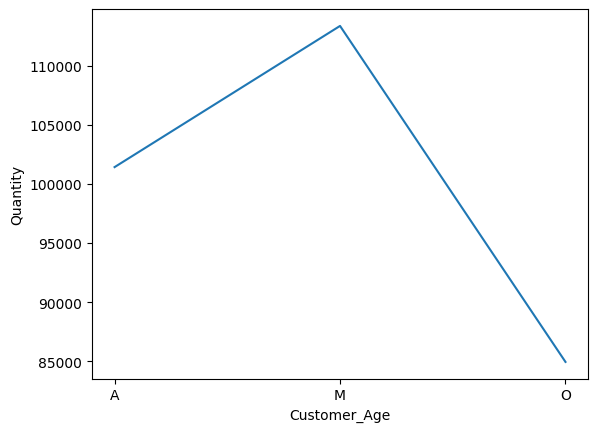

In [18]:
df4=df.groupby('Customer_Age').agg({'Quantity':'sum'}).reset_index()
sns.lineplot(x='Customer_Age',y='Quantity',data=df4)

In [19]:
df3['Customer_Age'].value_counts()

Customer_Age
70    1
43    1
41    1
40    1
39    1
38    1
37    1
36    1
35    1
34    1
33    1
32    1
31    1
30    1
29    1
28    1
27    1
26    1
25    1
24    1
23    1
22    1
21    1
20    1
19    1
42    1
44    1
69    1
45    1
68    1
67    1
66    1
65    1
64    1
63    1
62    1
61    1
60    1
59    1
58    1
57    1
56    1
55    1
54    1
53    1
52    1
51    1
50    1
49    1
48    1
47    1
46    1
18    1
Name: count, dtype: int64

## Model of Bikes Age groups are interested in 

In [20]:
df

,Date,Bike_Model,Price,Quantity,Store_Location,Payment_Method,Customer_Age,Customer_Gender
0,7,Cruiser,318.32,1,Philadelphia,Apple Pay,O,Female
1,5,Hybrid Bike,3093.47,4,Chicago,Apple Pay,M,Male
2,9,Folding Bike,4247.99,3,San Antonio,PayPal,O,Female
3,9,Mountain Bike,1722.01,3,San Antonio,Apple Pay,A,Male
4,1,BMX,3941.44,3,Philadelphia,PayPal,O,Female
...,...,...,...,...,...,...,...,...
99995,6,Hybrid Bike,3088.13,2,Philadelphia,PayPal,O,Female
99996,12,Road Bike,1051.44,2,Phoenix,Credit Card,O,Female
99997,2,Folding Bike,2783.79,4,Phoenix,Google Pay,M,Female
99998,12,Hybrid Bike,4265.42,4,Philadelphia,Credit Card,O,Male


In [21]:
df2=df[df.Customer_Age=='O']['Bike_Model'].value_counts()
df2

Bike_Model
BMX              4133
Cruiser          4129
Hybrid Bike      4122
Road Bike        4061
Mountain Bike    4025
Electric Bike    3996
Folding Bike     3993
Name: count, dtype: int64

In [22]:
df2=df[df.Customer_Age=='M']['Bike_Model'].value_counts()
df2

Bike_Model
Folding Bike     5501
Road Bike        5469
BMX              5414
Electric Bike    5373
Hybrid Bike      5367
Mountain Bike    5303
Cruiser          5222
Name: count, dtype: int64

<Axes: title={'center': 'BIKE PREFERENCE FOR ADULTS'}, xlabel='Bike_Model', ylabel='count'>

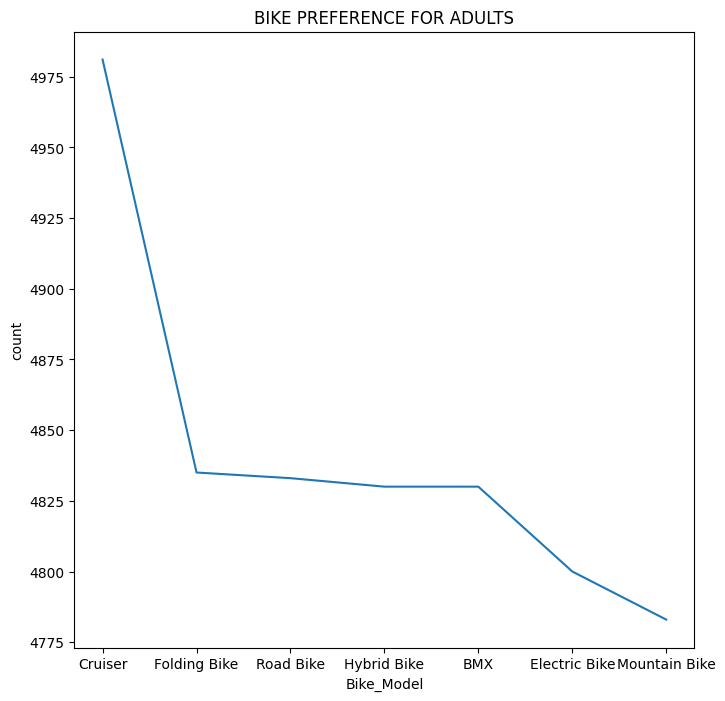

In [23]:
df2=df[df.Customer_Age=='A']['Bike_Model'].value_counts().reset_index()
plt.figure(figsize=(8,8))
plt.title("BIKE PREFERENCE FOR ADULTS")
sns.lineplot(x='Bike_Model',y='count',data=df2)

<Axes: title={'center': 'BIKE PREFERENCE FOR MIDDLE AGED'}, xlabel='Bike_Model', ylabel='count'>

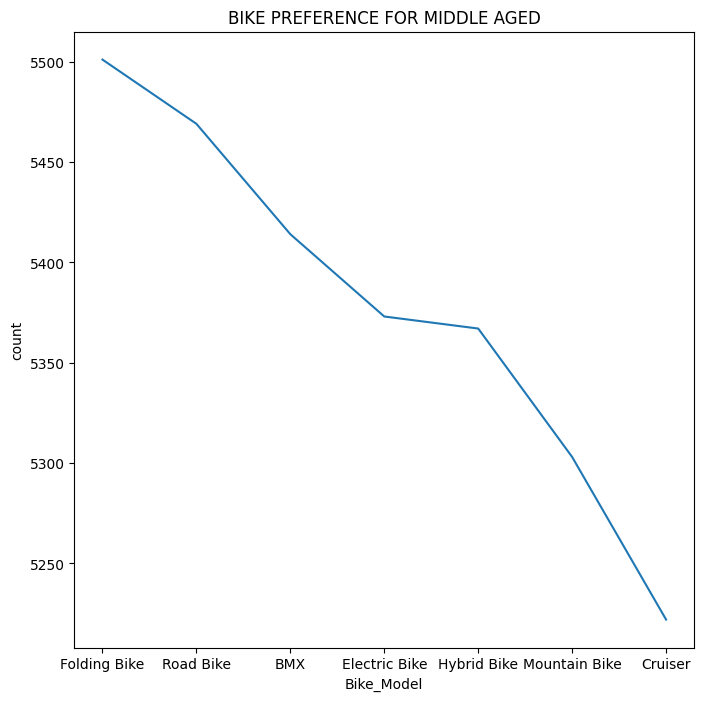

In [24]:
df2=df[df.Customer_Age=='M']['Bike_Model'].value_counts().reset_index()
plt.figure(figsize=(8,8))
plt.title("BIKE PREFERENCE FOR MIDDLE AGED")
sns.lineplot(x='Bike_Model',y='count',data=df2)

<Axes: title={'center': 'BIKE PREFERENCE FOR OLD AGED'}, xlabel='Bike_Model', ylabel='count'>

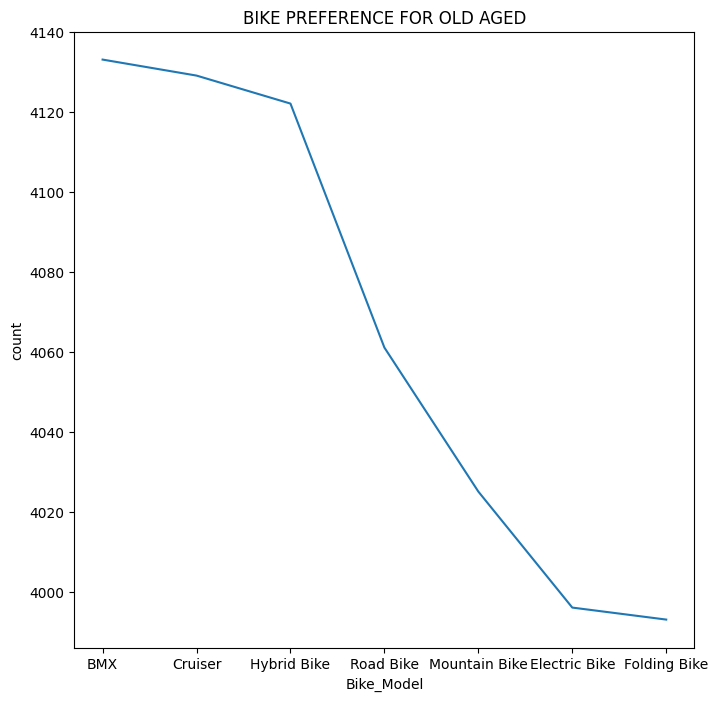

In [25]:
df2=df[df.Customer_Age=='O']['Bike_Model'].value_counts().reset_index()
plt.figure(figsize=(8,8))
plt.title("BIKE PREFERENCE FOR OLD AGED")
sns.lineplot(x='Bike_Model',y='count',data=df2)

## BIKE PREFERENCE BY GENDER

<Axes: title={'center': 'GENDER VS BIKE BOUGHT'}, xlabel='Customer_Gender', ylabel='Quantity'>

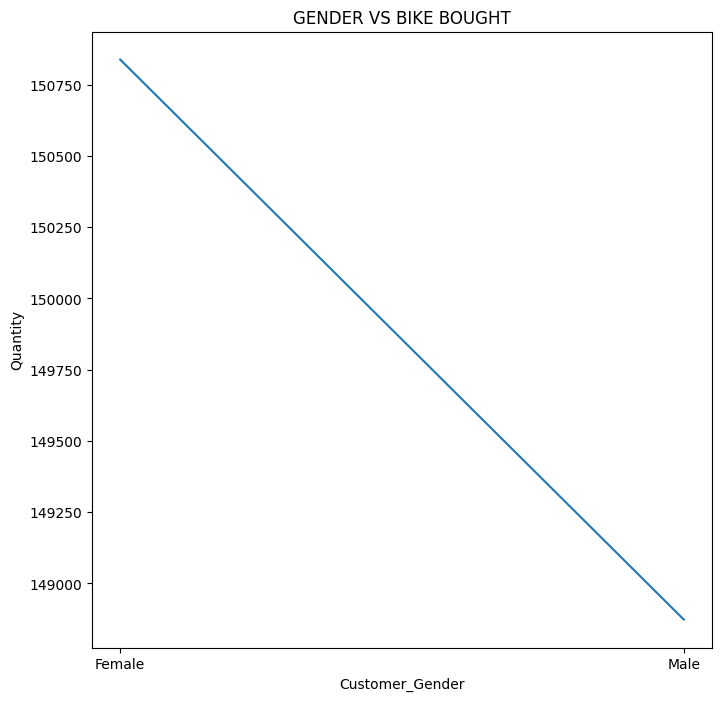

In [26]:
df2=df.groupby("Customer_Gender").agg({"Quantity":"sum"}).reset_index()
plt.figure(figsize=(8,8))
plt.title("GENDER VS BIKE BOUGHT")
df2
sns.lineplot(x='Customer_Gender',y='Quantity',data=df2)

### We can drop Payment_Method because it is not significant. 

In [27]:
df.drop(columns=["Payment_Method"],inplace=True)

## PREDICT THE QUANTITY OF BIKES THAT CAN BE SOLD IN A PARTICULAR MONTH

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder


In [29]:
df.columns

Index(['Date', 'Bike_Model', 'Price', 'Quantity', 'Store_Location',
       'Customer_Age', 'Customer_Gender'],
      dtype='object')

In [30]:
independent_features = list(df.drop(columns=['Quantity']).columns)
dependent_features = ['Quantity']

In [31]:
independent_features

['Date',
 'Bike_Model',
 'Price',
 'Store_Location',
 'Customer_Age',
 'Customer_Gender']

In [32]:
transformer = ColumnTransformer([
    
    ("encode",OneHotEncoder(),['Bike_Model','Store_Location','Customer_Gender','Customer_Age']),
    ("Scaler",StandardScaler(),["Price"])
])

lbl=LabelEncoder()

# MODEL TRAINING

In [33]:
# WE WILL CREATE A SUMMARISED DATA SET 
df2=df.groupby(["Date","Bike_Model","Customer_Gender","Store_Location","Customer_Age"]).agg({"Quantity":"sum","Price":"mean"}).reset_index()
df2

,Date,Bike_Model,Customer_Gender,Store_Location,Customer_Age,Quantity,Price
0,1,BMX,Female,Chicago,A,86,2738.058529
1,1,BMX,Female,Chicago,M,121,2815.330000
2,1,BMX,Female,Chicago,O,76,2670.418636
3,1,BMX,Female,Houston,A,84,2629.621481
4,1,BMX,Female,Houston,M,91,2644.399412
...,...,...,...,...,...,...,...
3523,12,Road Bike,Male,Phoenix,M,113,2705.287143
3524,12,Road Bike,Male,Phoenix,O,55,2993.703000
3525,12,Road Bike,Male,San Antonio,A,70,2198.192609
3526,12,Road Bike,Male,San Antonio,M,76,2986.206250


In [34]:
def quantity_categorise(s):
    if s>=100:
        return "High"
    if s<100 and s>50:
        return "Medium"
    else:
        return "Low"
df2['Quantity']=df2['Quantity'].apply(lambda s:quantity_categorise(s))

In [35]:
df2

,Date,Bike_Model,Customer_Gender,Store_Location,Customer_Age,Quantity,Price
0,1,BMX,Female,Chicago,A,Medium,2738.058529
1,1,BMX,Female,Chicago,M,High,2815.330000
2,1,BMX,Female,Chicago,O,Medium,2670.418636
3,1,BMX,Female,Houston,A,Medium,2629.621481
4,1,BMX,Female,Houston,M,Medium,2644.399412
...,...,...,...,...,...,...,...
3523,12,Road Bike,Male,Phoenix,M,High,2705.287143
3524,12,Road Bike,Male,Phoenix,O,Medium,2993.703000
3525,12,Road Bike,Male,San Antonio,A,Medium,2198.192609
3526,12,Road Bike,Male,San Antonio,M,Medium,2986.206250


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df2[independent_features],df2[dependent_features],test_size=0.25,random_state=42)

In [37]:
X_train=transformer.fit_transform(X_train)
X_test= transformer.transform(X_test)
Y_train = lbl.fit_transform(Y_train)
Y_test = lbl.transform(Y_test)

In [38]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred  = model.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.717687074829932


# MODEL ACCURACY = 71.76%

# FUTURISTIC PREDICTIONS
### Predict estimated bike sales in New York for December Month

In [39]:
df2[(df2.Bike_Model=='BMX')&(df2.Store_Location=='New York')]

,Date,Bike_Model,Customer_Gender,Store_Location,Customer_Age,Quantity,Price
9,1,BMX,Female,New York,A,High,2298.535946
10,1,BMX,Female,New York,M,High,2643.035405
11,1,BMX,Female,New York,O,Medium,3084.261613
30,1,BMX,Male,New York,A,Medium,2612.981923
31,1,BMX,Male,New York,M,Medium,2155.172812
...,...,...,...,...,...,...,...
3244,12,BMX,Female,New York,M,Medium,2683.714231
3245,12,BMX,Female,New York,O,Medium,2333.635556
3264,12,BMX,Male,New York,A,High,3439.018214
3265,12,BMX,Male,New York,M,Medium,2413.712727


In [40]:
test_df = pd.DataFrame()
test_df['Date']=[1]
test_df['Bike_Model']=['BMX']
test_df['Customer_Gender']=['Female']
test_df['Store_Location']=['New York']
test_df['Customer_Age']=['M']
test_df['Price']=['2683']
X_test = transformer.transform(test_df)



In [41]:
print("Estimated Quantity  BMX Bikes predicted to be bought by Senior Aged Group ( Above 55)  in New York are in December for 2683$ : ",lbl.inverse_transform(model.predict(X_test))[0])

Estimated Quantity  BMX Bikes predicted to be bought by Senior Aged Group ( Above 55)  in New York are in December for 2683$ :  High


## **High** Amount number of bikes will be bought by above group